In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# GemPy v2 (beta) Introduction


In [2]:
from IPython.display import IFrame
IFrame("https://steno3d.com/embed/mWACfOTPB2vT3scgJABp", width="800", height="600")

<center>

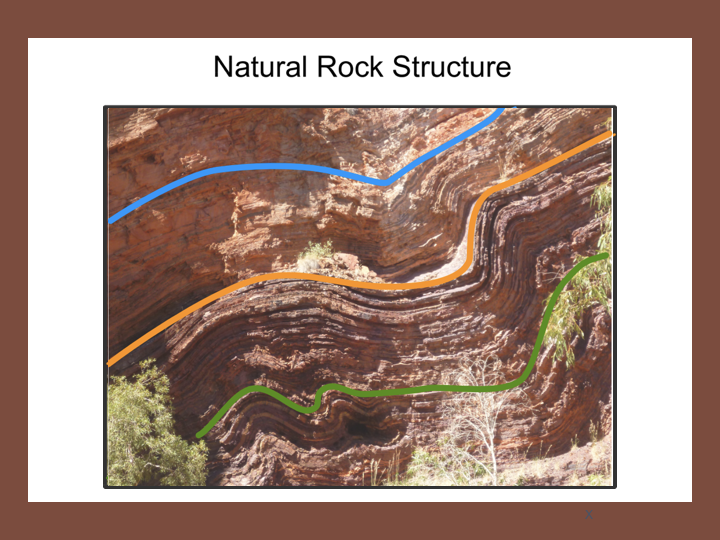
</center>

<center>

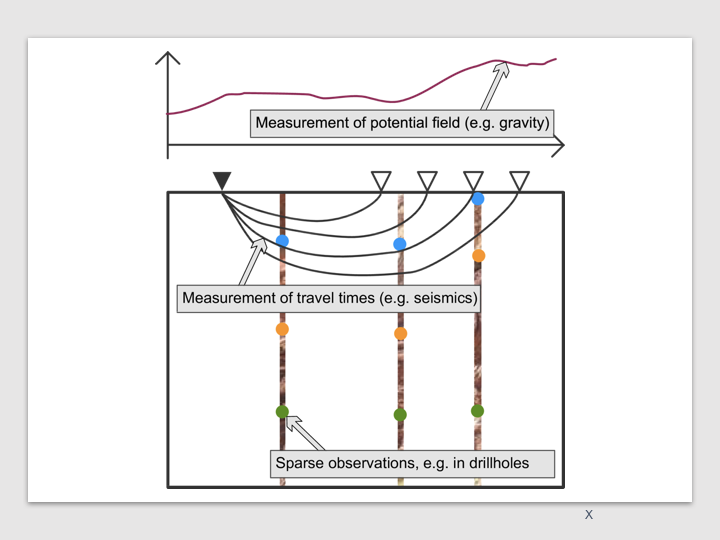
</center>

<center>

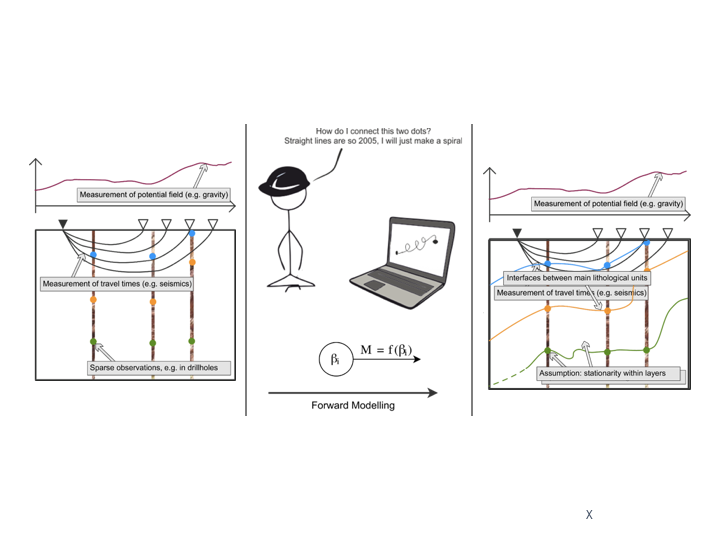
</center>

### Does exist a function $f(x)$ where 
### f is a geological model and
### x --- outcrops, gravity, seismic, boreholes?

(respecting all physics, temporal relations and able to deal with noisy and erroneous observations)




\begin{equation}
Z({\bf{x}}_0)=
\begin{bmatrix}
a_{{\partial {\bf{Z}}/ \partial u, \, \partial {\bf{Z}}/ \partial v}}  \\
b_{{\bf{Z}, \,\bf{Z}}} \\
c 
\end{bmatrix}
\left[ \begin{array}{cc}
{\bf{c_{\partial {\bf{Z}}/ \partial u, \, \partial {\bf{Z}}/ \partial v}}} & {\bf{c_{\partial {\bf{Z}}/ \partial u, \, Z}}} \\
{\bf{c_{Z, \,\partial {\bf{Z}}/ \partial u}}} &  {\bf{c_{\bf{Z}, \,\bf{Z}}}} \\
{\bf{f_{10}}} & {\bf{f_{20}}} \end{array} \right]
\end{equation}



In [3]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Importing aux libraries
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt

# Embedding matplotlib figures in the notebooks
%matplotlib inline

### 2 layers Model

In [4]:
# Create gempy model object
hlayers_model = gp.create_model('2-layers')
gp.init_data(hlayers_model, 
             extent=[0,1000,0,1000,0,1000],
             resolution=[50,50,50], 
            path_o = os.pardir+"/data/input_data/jan_models/model1_orientations.csv",
            path_i = os.pardir+"/data/input_data/jan_models/model1_surface_points.csv")

Active grids: ['regular']


2-layers  2019-11-04 12:22

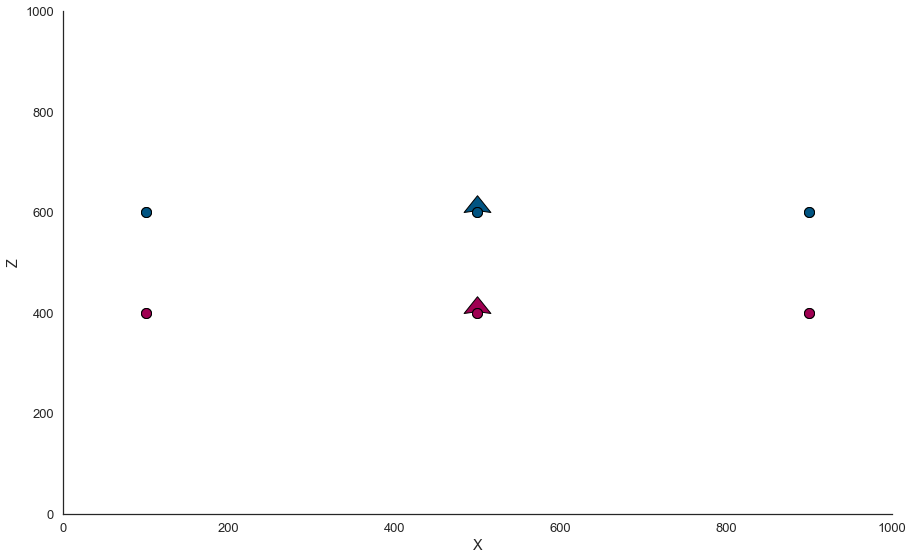

In [5]:
gp.plot.plot_data(hlayers_model) 

In [6]:
vtk_object = gp.plot.plot_3D  (hlayers_model)

holding... Use vtk.resume to go back to the interactive window


In [7]:
 gp.set_interpolation_data(hlayers_model, compile_theano=True, theano_optimizer='fast_run')

Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


In [8]:
vtk_object.set_real_time_on()
def modify_layers(z_pos=400):
    idx = hlayers_model.surface_points.df.index[hlayers_model.surface_points.df['surface'] == 'rock1']
    hlayers_model.modify_surface_points(idx, Z= z_pos, plot_object = vtk_object)
    gp.compute_model(hlayers_model)
    gp.plot.plot_section(hlayers_model, show_data=True)

In [9]:
interact(modify_layers, z_pos= (0, 1000, 100))

interactive(children=(IntSlider(value=400, description='z_pos', max=1000, step=100), Output()), _dom_classes=(…

<function __main__.modify_layers(z_pos=400)>

In [10]:
vtk_object.resume()

## Fabian Model

Active grids: ['regular']


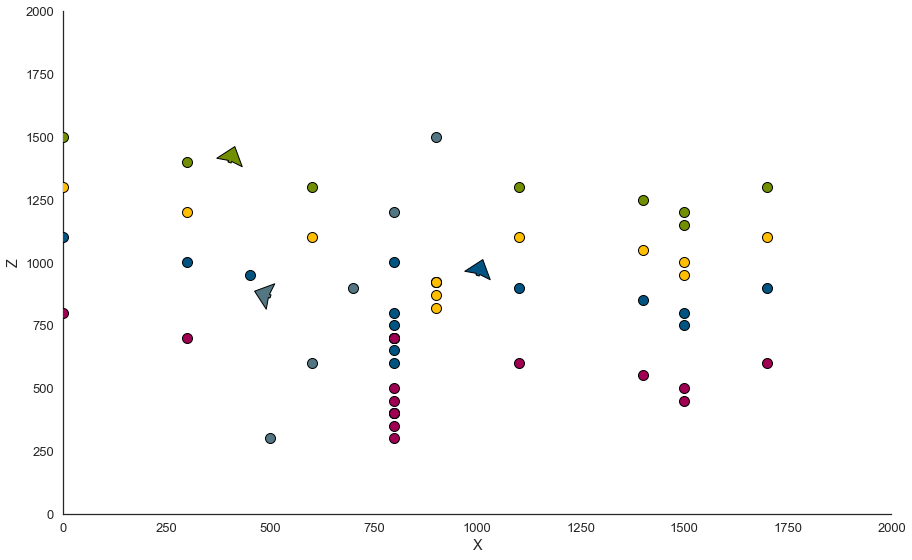

In [11]:
fab_model = gp.load_model('Tutorial_ch1-1_Basics', path=os.pardir+'/data/gempy_models')
gp.plot.plot_data(fab_model)

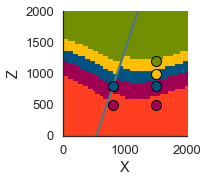

In [12]:
fab_model.set_theano_function(hlayers_model.interpolator)
gp.compute_model(fab_model)
gp.plot.plot_section(fab_model, show_data=True)

### Fault offseting only one series

Active grids: ['regular']


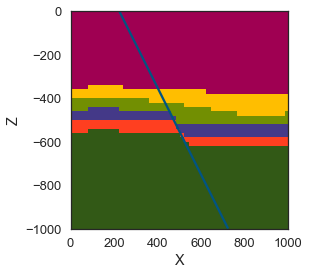

In [13]:
fault1 = gp.load_model('Tutorial_ch1-9a_Fault_relations', path= '../data/gempy_models', recompile=False)
fault1.set_theano_function(hlayers_model.interpolator)
gp.compute_model(fault1)
gp.plot.plot_section(fault1, show_data=True)

### Fault offsetting fault


Active grids: ['regular']


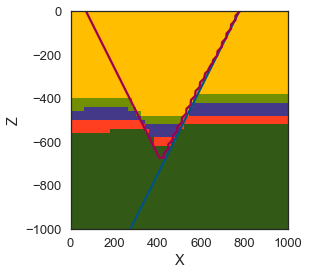

In [14]:
fault2 = gp.load_model('Tutorial_ch1-9b_Fault_relations', path= '../data/gempy_models', recompile=False)
fault2.set_theano_function(hlayers_model.interpolator)
gp.compute_model(fault2)
gp.plot.plot_section(fault2, show_data=True)

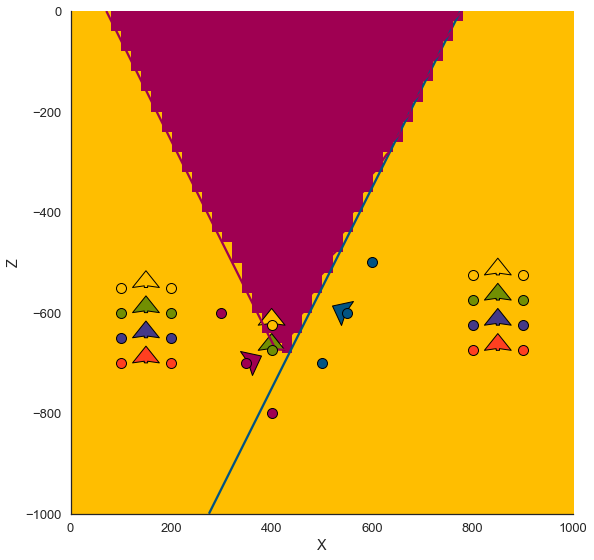

In [15]:
gp.plot.plot_section(fault2, 25,
                     block=fault2.solutions.block_matrix[1, 0, :125000], show_data=True)

## Topology

In [16]:
from gempy.assets import topology as tp
G, c, *_ = tp.compute_topology(fault2, filter_rogue=True, filter_threshold_area = 100)

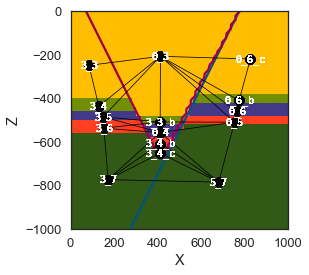

In [17]:
gp.plot.plot_section(fault2, 2)
gp.plot.plot_topology(fault2, G, c)

## Onlap and topography

In [18]:
onlap_model = gp.load_model('Tutorial_ch1-8_Onlap_relations', path= '../data/gempy_models', recompile=False)
onlap_model.set_theano_function(hlayers_model.interpolator)

Active grids: ['regular']


True

Active grids: ['regular' 'topography']


array([ True, False,  True, False, False])

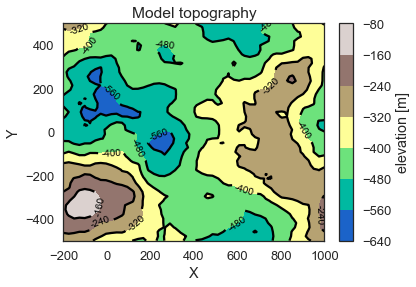

In [19]:
onlap_model.set_topography(d_z=np.array([-600,-100]))
onlap_model.grid.set_active('topography')

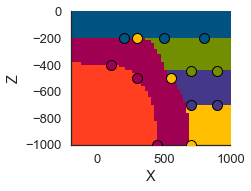

In [20]:
gp.compute_model(onlap_model, compute_mesh=True, debug=False)
gp.plot.plot_section(onlap_model, 25, show_data=True)

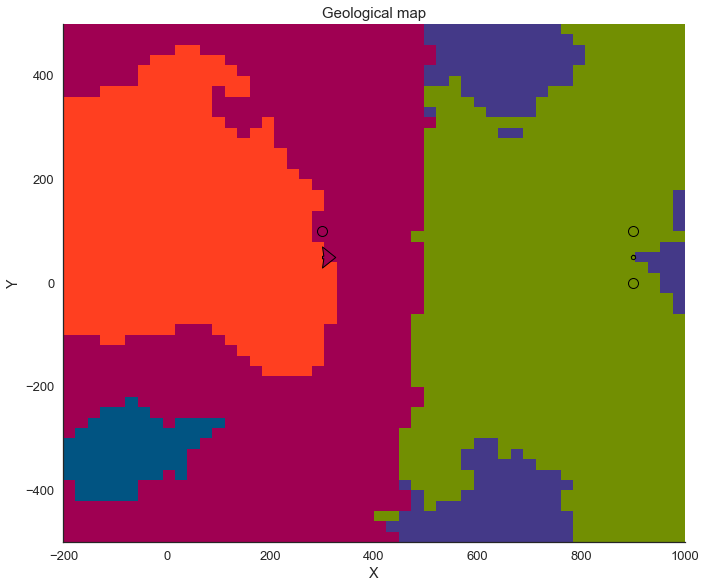

In [21]:
gp.plot.plot_map(onlap_model)

In [22]:
gp.plot.plot_3D(onlap_model) 

closing vtk


## Gravity

In [23]:
greenstone = gp.load_model('Greenstone', path= '../data/gempy_models')

Active grids: ['regular']


In [24]:
greenstone.set_theano_function(hlayers_model.interpolator)

True

In [25]:
grav_res = 20
X = np.linspace(7.050000e+05, 747000, grav_res)
Y = np.linspace(6863000, 6925000, grav_res)
Z= 300
xyz= np.meshgrid(X, Y, Z)
xy_ravel = np.vstack(list(map(np.ravel, xyz))).T
greenstone.set_centered_grid(xy_ravel,  resolution = [10, 10, 15], radio=5000)

Active grids: ['regular' 'centered']


Grid Object. Values: 
array([[ 6.96510000e+05,  6.86367000e+06, -1.97980000e+04],
       [ 6.96510000e+05,  6.86367000e+06, -1.93940000e+04],
       [ 6.96510000e+05,  6.86367000e+06, -1.89900000e+04],
       ...,
       [ 7.52000000e+05,  6.93000000e+06, -3.10768481e+03],
       [ 7.52000000e+05,  6.93000000e+06, -4.31811404e+03],
       [ 7.52000000e+05,  6.93000000e+06, -6.00000000e+03]])

In [26]:
greenstone.set_gravity_interpolator(pos_density=1, theano_optimizer='fast_run')

Compiling theano function...


../../gempy/core/model.py:1257: UserWarning: set_gravity_interpolator will be deprecated in GemPy 2.2. Use gempy.set_interpolator(geo_model, type='grav') instead
  warnings.warn('set_gravity_interpolator will be deprecated in GemPy 2.2.'


Compilation Done!


,values
dtype,float32
output,geology
theano_optimizer,fast_run
device,cpu
verbosity,[]


Active grids: ['regular' 'centered']


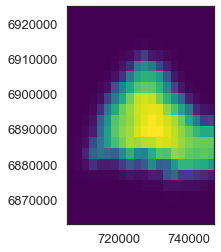

In [28]:
sol = gp.compute_model(greenstone, output='gravity')
plt.imshow(sol.fw_gravity.reshape(grav_res, grav_res), 
           extent= [7.050000e+05, 747000, 6863000, 6925000],
           cmap='viridis_r', origin='bottom')

In [29]:
greenstone.set_active_grid('regular')

Active grids: ['regular' 'centered']


Grid Object. Values: 
array([[ 6.96510000e+05,  6.86367000e+06, -1.97980000e+04],
       [ 6.96510000e+05,  6.86367000e+06, -1.93940000e+04],
       [ 6.96510000e+05,  6.86367000e+06, -1.89900000e+04],
       ...,
       [ 7.52000000e+05,  6.93000000e+06, -3.10768481e+03],
       [ 7.52000000e+05,  6.93000000e+06, -4.31811404e+03],
       [ 7.52000000e+05,  6.93000000e+06, -6.00000000e+03]])

In [30]:
gp.compute_model(greenstone, output='geology')


Lithology ids 
  [5. 5. 5. ... 5. 5. 5.] 

In [32]:
def plot_grav_lith(alpha = 1):

    gp.plot.plot_section(greenstone, -1, direction='z')
    plt.imshow(sol.fw_gravity.reshape(grav_res, grav_res), 
               extent= [7.050000e+05, 747000, 6863000, 6925000],
               cmap='viridis_r', origin='bottom', alpha=alpha)
    
interact(plot_grav_lith, alpha= (0,1,.1))

interactive(children=(FloatSlider(value=1.0, description='alpha', max=1.0), Output()), _dom_classes=('widget-i…

<function __main__.plot_grav_lith(alpha=1)>